# Data Aanlysis of US Baby Names

## 0. Preprocessing 

import library: 
* pandas: for dataframe
* matplotlib.pyplot: for graph
* numpy : for matrix calculation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import all name files in to colab and check the file is correct.


In [ ]:
# open one file as example
ex_file = pd.read_csv('/content/yob1880.txt')
ex_file.columns = ['name', 'sex', 'count']
ex_file.head() # show the upper 5 values 

,name,sex,count
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578


check the missing values and outliers.
* If there is missing value = put mean value of count
* If there is outlier value = drop the row

In [ ]:
# read txt files
for year in range(1880, 2021):
  df = pd.read_csv(f'/content/yob{year}.txt')
  df.columns = ['name', 'sex', 'count']
  
df.head()

,name,sex,count
0,Emma,F,15581
1,Ava,F,13084
2,Charlotte,F,13003
3,Sophia,F,12976
4,Amelia,F,12704


In [ ]:
df.head()

,name,sex,count
0,Emma,F,15581
1,Ava,F,13084
2,Charlotte,F,13003
3,Sophia,F,12976
4,Amelia,F,12704


no missing values and outliers

Merge all dataframe in to one
* load files and set column name
* use for-loop to add new column('year')

In [ ]:
pieces = [] #new dataframe
columns = ['name', 'sex', 'count']

for year in range(1880, 2021):
    df = pd.read_csv(f'/content/yob{year}.txt', names=columns)
    df['year'] = year
    pieces.append(df)

    
df_all = pd.concat(pieces, ignore_index = True)
df_all

,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2020858,Zykell,M,5,2020
2020859,Zylus,M,5,2020
2020860,Zymari,M,5,2020
2020861,Zyn,M,5,2020


## 1. Total babies of each year

use "DataFrame.groupby()" to calculate the sum of count in the same year

In [ ]:
both = df_all.groupby("year").sum() #sum of count
both.head() # show upper 5 values

,count
year,
1880,201484
1881,192691
1882,221533
1883,216944
1884,243461


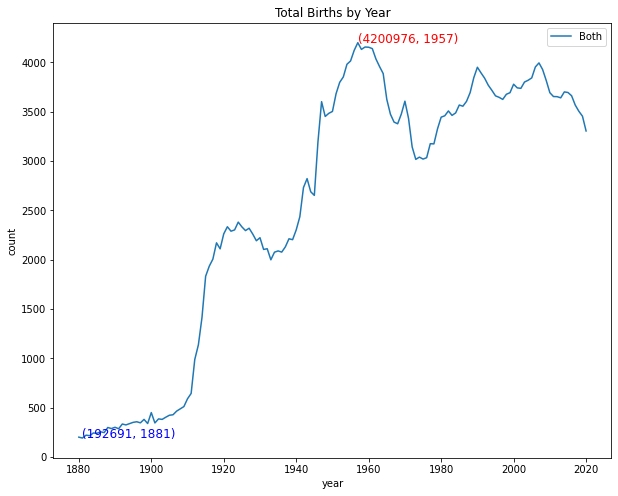

In [ ]:
total = plt.figure(figsize = (10,8))
plt.plot(both.index, both['count']//1000, label = 'Both') # per 1000 people
plt.xlabel('year')
plt.ylabel('count')
plt.legend()
plt.title('Total Births by Year')
plt.text(both.idxmax()['count'], both.max()['count']//1000, (both.max()['count'], both.idxmax()['count']), fontsize=12, color='red')
plt.text(both.idxmin()['count'], both.min()['count']//1000, (both.min()['count'], both.idxmin()['count']), fontsize=12, color='blue')
total.show()

# from google.colab import files
# plt.savefig("total births by year.png", dpi=300)
# files.download("total births by year.png") 

## 2. Total babies by sex and year

### sum of female/male babies by year

In [ ]:
total_genders = df_all.pivot_table('count', columns='sex', index='year', aggfunc=sum)
total_genders

sex,F,M
year,,
1880,90994,110490
1881,91953,100738
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2016,1768360,1893917
2017,1722140,1846154
2018,1695654,1810309


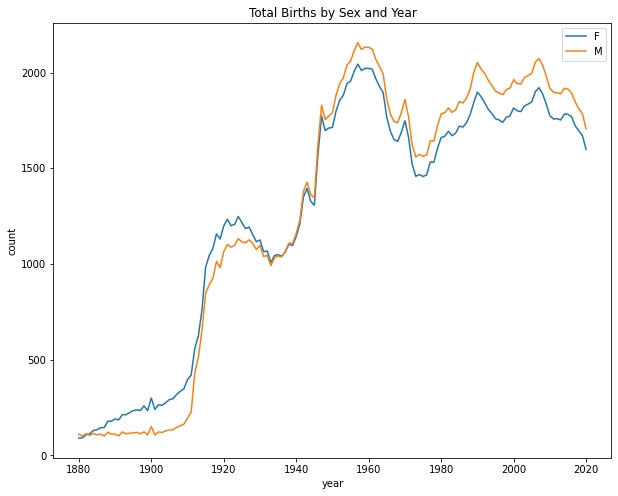

In [ ]:
gender = plt.figure(figsize=(10,8))
plt.plot(total_genders.index, total_genders['F']//1000, label = 'F') # per 1000 people
plt.plot(total_genders.index, total_genders['M']//1000, label = 'M')
plt.legend()
plt.xlabel('year')
plt.ylabel('count')
plt.title('Total Births by Sex and Year')
gender.show()

# from google.colab import files
# plt.savefig("total births by sex and year.png", dpi=300)
# files.download("total births by sex and year.png") 

## 3. Highest & Lowest baby sum by year

In [ ]:
both = df_all.groupby('year').sum() # bring the code above
male = df_all[df_all['sex'] == 'M'].groupby('year').sum()
female = df_all[df_all['sex'] == 'F'].groupby('year').sum()

In [ ]:
# Both max
both_max_val = both.max()['count']
both_max_idx = both.idxmax()['count']

# Both min
both_min_val = both.min()['count']
both_min_idx = both.idxmin()['count']

print("maximum value: ", both_max_val, "maximum value index: ", both_max_idx)
print("minimum value: ", both_min_val, "minimum value index: ", both_min_idx)

maximum value:  4200976 maximum value index:  1957
minimum value:  192691 minimum value index:  1881


In [ ]:
# Male max
male_max_val = male.max()['count']
male_max_idx = male.idxmax()['count']

# male min
male_min_val = male.min()['count']
male_min_idx = male.idxmin()['count']

print("maximum value: ", male_max_val, "maximum value index: ", male_max_idx)
print("minimum value: ", male_min_val, "minimum value index: ", male_min_idx)

maximum value:  2156403 maximum value index:  1957
minimum value:  100738 minimum value index:  1881


In [ ]:
# female max
female_max_val = female.max()['count']
female_max_idx = female.idxmax()['count']

# female min
female_min_val = female.min()['count']
female_min_idx = female.idxmin()['count']

print("maximum value: ", female_max_val, "maximum value index: ", female_max_idx)
print("minimum value: ", female_min_val, "minimum value index: ", female_min_idx)

maximum value:  2044573 maximum value index:  1957
minimum value:  90994 minimum value index:  1880


### Lowest Table and graph

In [ ]:
low_year = pd.DataFrame({
    'both min' : [both_min_val, both_min_idx],
    'male min' : [male_min_val, male_min_idx],
    'female min': [female_min_val, female_min_idx]
}, 
index=['count', 'year'])

low_year
# low_year_df.T # change index and columns >> The table was organized to make it easier to recognize

,both min,male min,female min
count,192691,100738,90994
year,1881,1881,1880


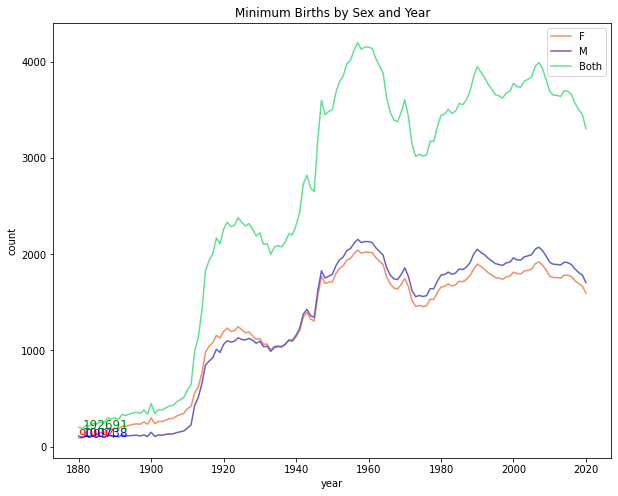

In [ ]:
minimum_all = plt.figure(figsize=(10,8))

plt.plot(female.index, female['count']//1000, label = 'F', color='#f28e69') # per 1000 people
plt.plot(male.index, male['count']//1000, label = 'M', color='#6262c1')
plt.plot(both.index, both['count']//1000, label = 'Both', color='#62df94')

plt.legend()
plt.xlabel('year')
plt.ylabel('count')
plt.title('Minimum Births by Sex and Year')

plt.text(female_min_idx, female_min_val//1000, female_min_val, fontsize=12, color='red')
plt.text(male_min_idx, male_min_val//1000, male_min_val, fontsize=12, color='blue')
plt.text(both_min_idx, both_min_val//1000, both_min_val, fontsize=12, color='green')

minimum_all.show()

# from google.colab import files
# plt.savefig("Minimum births by sex and year.png", dpi=300)
# files.download("Minimum births by sex and year.png") 

### Highest table and graph

In [ ]:
high_year = pd.DataFrame({
    'both max' : [both_max_val, both_max_idx],
    'male max' : [male_max_val, male_max_idx],
    'female max': [female_max_val, female_max_idx]
}, 
index=['count', 'year'])

high_year

,both max,male max,female max
count,4200976,2156403,2044573
year,1957,1957,1957


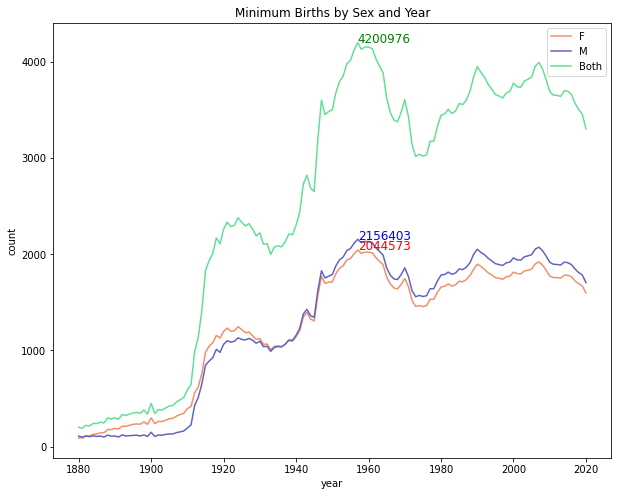

In [ ]:
maximum_all = plt.figure(figsize=(10,8))

plt.plot(female.index, female['count']//1000, label = 'F', color='#f28e69') # per 1000 people
plt.plot(male.index, male['count']//1000, label = 'M', color='#6262c1')
plt.plot(both.index, both['count']//1000, label = 'Both', color='#62df94')

plt.legend()
plt.xlabel('year')
plt.ylabel('count')
plt.title('Maximum Births by Sex and Year')

plt.text(female_max_idx, female_max_val//1000, female_max_val, fontsize=12, color='red')
plt.text(male_max_idx, male_max_val//1000, male_max_val, fontsize=12, color='blue')
plt.text(both_max_idx, both_max_val//1000, both_max_val, fontsize=12, color='green')

maximum_all.show()

# from google.colab import files
# plt.savefig("Maximum births by sex and year.png", dpi=300)
# files.download("Maximum births by sex and year.png") 

## 4. The relative change of total births by years

### both

make a copy for both_df in order to make new DataFrame

In [ ]:
both_copy = both.copy()
both_copy['year range'] = [f"{year-1} - {year}" for year in range(1880, 2021)]
both_copy['count change'] = (both_copy['count'].shift(-1) - both_copy['count']).shift(1)
both_copy.reset_index(inplace=True)
both_copy.fillna(0, inplace = True)
both_copy.drop(columns=['year', 'count'], index=0, inplace=True)
both_copy.head(3)

,year range,count change
1,1880 - 1881,-8793.0
2,1881 - 1882,28842.0
3,1882 - 1883,-4589.0


In [ ]:
both_copy['abs change'] = abs(both_copy['count change'])

# find index of maximum 'abs change'
both_abs_max_idx = np.argmax(both_copy['abs change'])

# find index of minimum'abs change'
both_abs_min_idx = np.argmin(both_copy['abs change'])

print('index number of maximum changing count: ', both_abs_max_idx)
print('index number of minimum changing count: ',both_abs_min_idx)

index number of maximum changing count:  65
index number of minimum changing count:  131


In [ ]:
print('maximum changing count: ', both_copy['count change'].iloc[both_abs_max_idx])
print('minimum changing count: ', both_copy['count change'].iloc[both_abs_min_idx])

maximum changing count:  542383.0
minimum changing count:  -712.0


In [ ]:
# max change & year
both_max_change = both_copy['count change'].iloc[both_abs_max_idx]
both_max_year = both_copy['year range'].iloc[both_abs_max_idx]

# min change &. year
both_min_change = both_copy['count change'].iloc[both_abs_min_idx]
both_min_year = both_copy['year range'].iloc[both_abs_min_idx]

both_count_change = {
    'Both Change Max' : [both_max_change, both_max_year],
    'Both Change Min' : [both_min_change, both_min_year]
}

both_count_change_df = pd.DataFrame(both_count_change, index=['count change', 'year range'])
both_count_change_df

,Both Change Max,Both Change Min
count change,542383,-712
year range,1945 - 1946,2011 - 2012


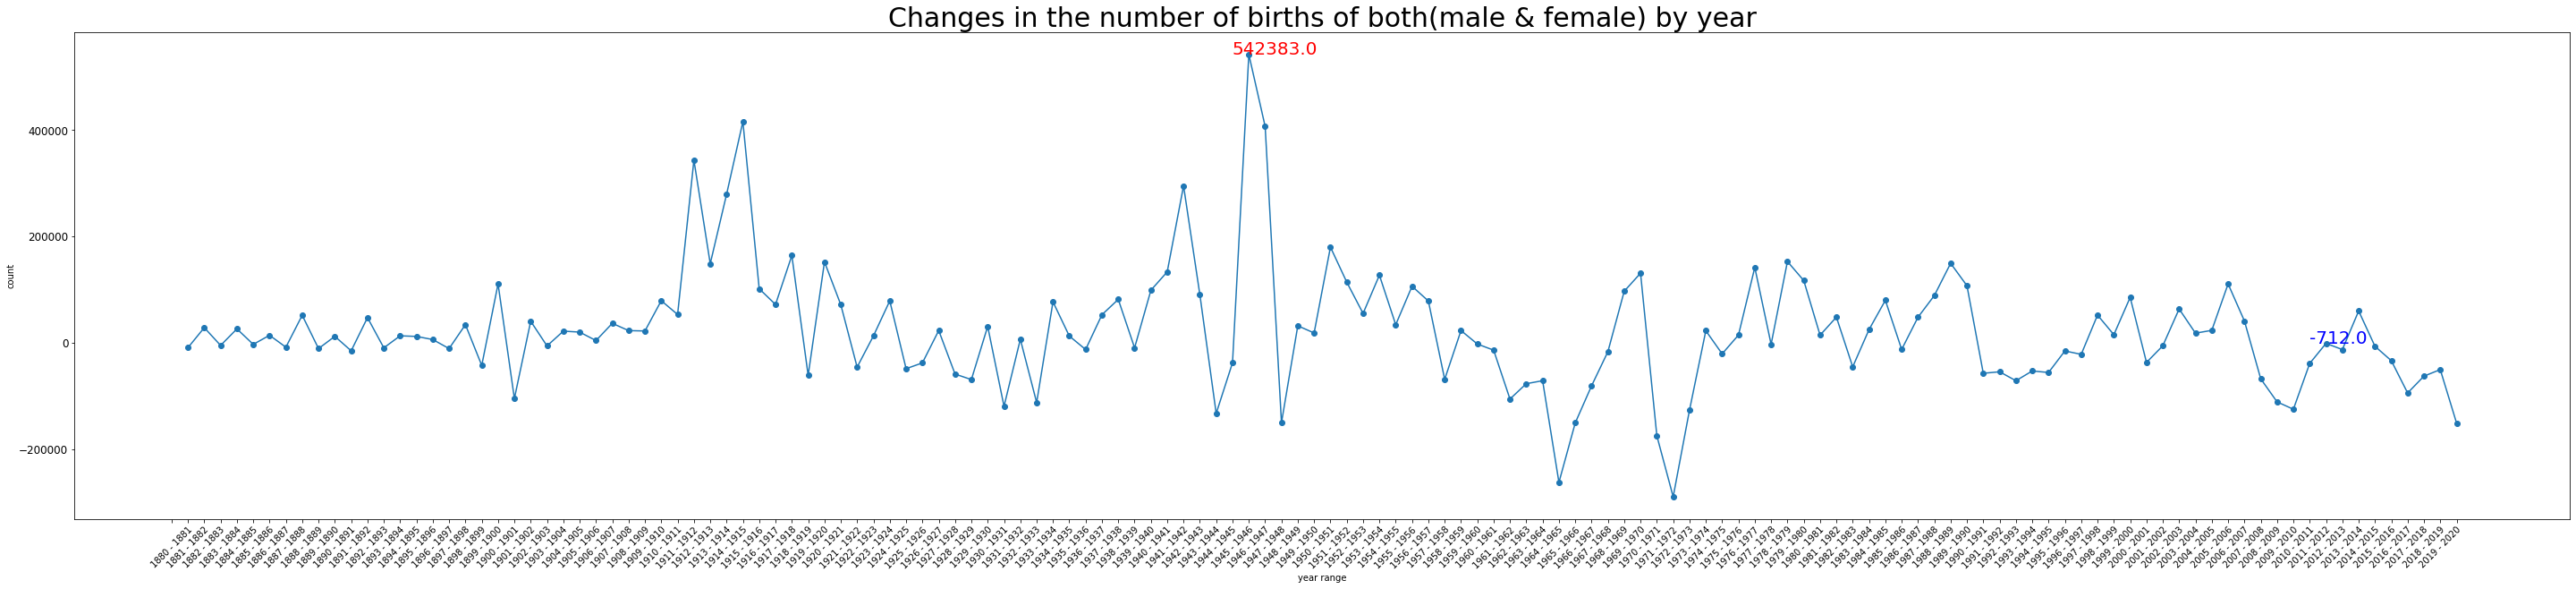

In [ ]:
# draw the graph
change_both = plt.figure(figsize=(50,10))
plt.plot(both_copy.index, both_copy['count change'], marker='o')
plt.yticks(fontsize=12)
plt.xticks(np.arange(141), both_copy['year range'], rotation=45, fontsize=10)
plt.text(both_abs_max_idx, both_copy['count change'].iloc[both_abs_max_idx], both_copy['count change'].iloc[both_abs_max_idx], fontsize=20, color='red')
plt.text(both_abs_min_idx, both_copy['count change'].iloc[both_abs_min_idx], both_copy['count change'].iloc[both_abs_min_idx], fontsize=20, color='blue')
plt.title('Changes in the number of births of both(male & female) by year', fontsize=30)
plt.xlabel('year range')
plt.ylabel('count')
change_both.show()

# from google.colab import files
# plt.savefig("change births by year (both).png", dpi=300)
# files.download("change births by year (both).png") 

### Male

In [ ]:
male_copy = male.copy()
male_copy['year range'] = [f"{year-1} - {year}" for year in range(1880, 2021)]
male_copy['count change'] = (male_copy['count'].shift(-1) - male_copy['count']).shift(1)
male_copy.reset_index(inplace=True)
male_copy.fillna(0, inplace = True)
male_copy.drop(columns=['year', 'count'], index=0, inplace=True)
male_copy.head(3)

,year range,count change
1,1880 - 1881,-9752.0
2,1881 - 1882,12948.0
3,1882 - 1883,-9061.0


In [ ]:
male_copy['abs change'] = abs(male_copy['count change'])

# find index of maximum 'abs change'
male_abs_max_idx = np.argmax(male_copy['abs change'])

# find index of minimum 'abs change'
male_abs_min_idx = np.argmin(male_copy['abs change'])

print('index number of maximum changing count: ', male_abs_max_idx)
print('index number of minimum changing count: ',male_abs_min_idx)

index number of maximum changing count:  65
index number of minimum changing count:  9


In [ ]:
print('maximum changing count: ', male_copy['count change'].iloc[male_abs_max_idx])
print('minimum changing count: ', male_copy['count change'].iloc[male_abs_min_idx])

maximum changing count:  278174.0
minimum changing count:  444.0


In [ ]:
# max change & year
male_max_change = male_copy['count change'].iloc[male_abs_max_idx]
male_max_year = male_copy['year range'].iloc[male_abs_max_idx]

# min change &. year
male_min_change = male_copy['count change'].iloc[male_abs_min_idx]
male_min_year = male_copy['year range'].iloc[male_abs_min_idx]

male_count_change = {
    'Male Change Max' : [male_max_change, male_max_year],
    'Male Change Min' : [male_min_change, male_min_year]
}

male_count_change_df = pd.DataFrame(male_count_change, index=['count change', 'year range'])
male_count_change_df

,Male Change Max,Male Change Min
count change,278174,444
year range,1945 - 1946,1889 - 1890


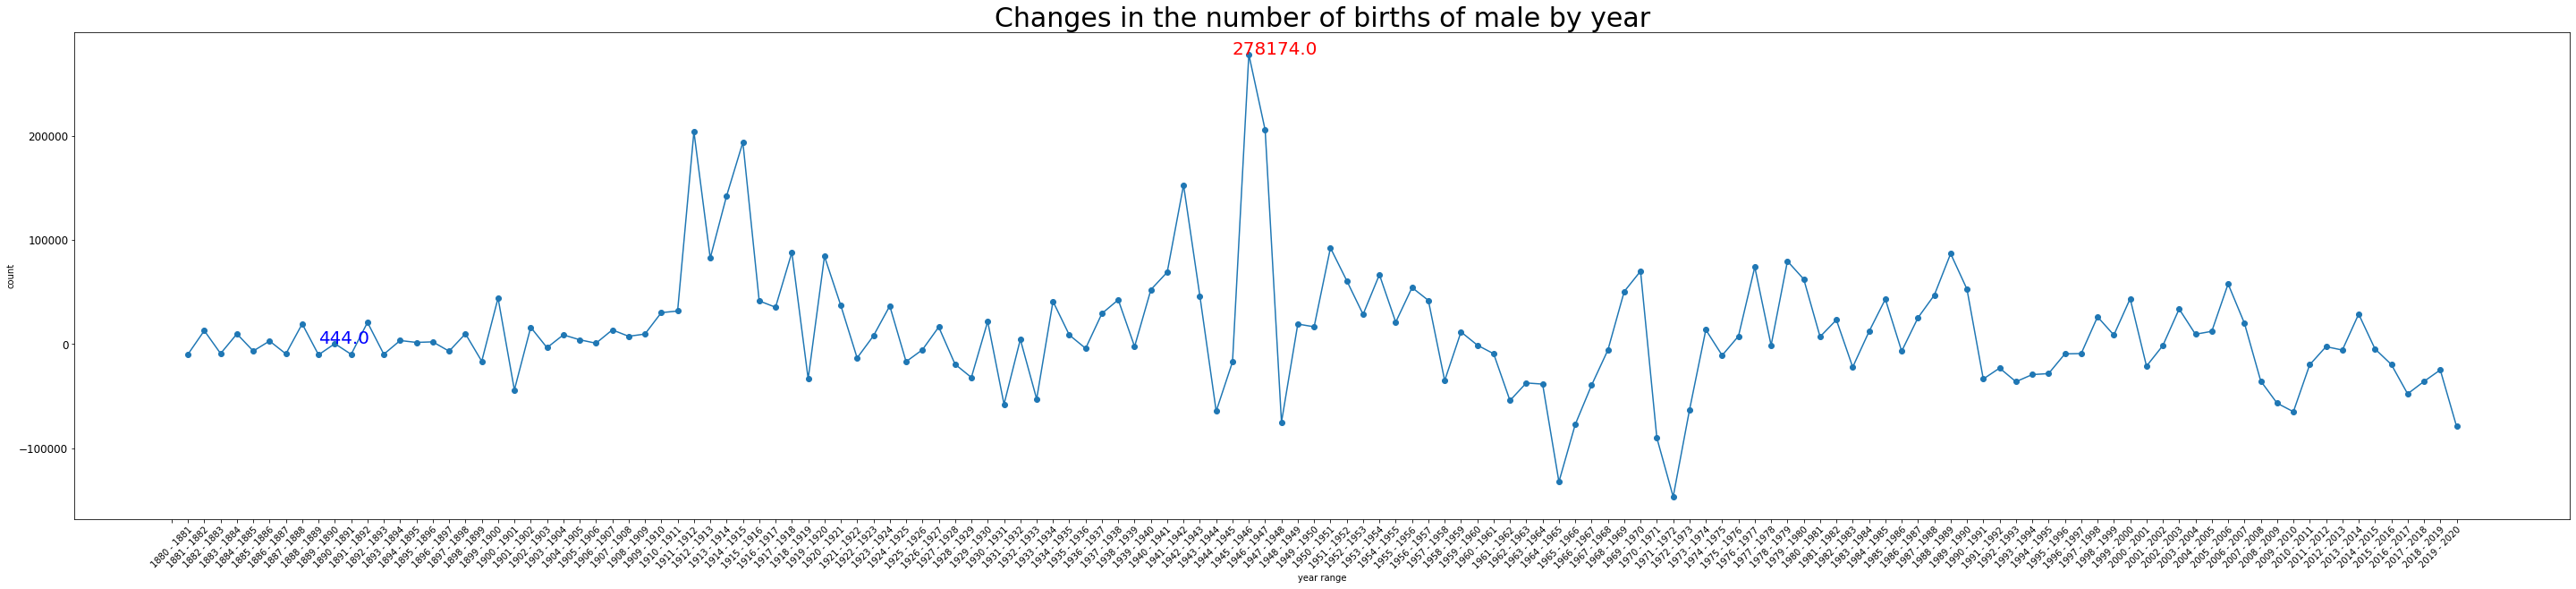

In [ ]:
# draw the graph
change_male = plt.figure(figsize=(50,10))
plt.plot(male_copy.index, male_copy['count change'], marker='o')
plt.yticks(fontsize=12)
plt.xticks(np.arange(141), male_copy['year range'], rotation=45, fontsize=10)
plt.text(male_abs_max_idx, male_copy['count change'].iloc[male_abs_max_idx], male_copy['count change'].iloc[male_abs_max_idx], fontsize=20, color='red')
plt.text(male_abs_min_idx, male_copy['count change'].iloc[male_abs_min_idx], male_copy['count change'].iloc[male_abs_min_idx], fontsize=20, color='blue')
plt.title('Changes in the number of births of male by year', fontsize=30)
plt.xlabel('year range')
plt.ylabel('count')
change_male.show()

# from google.colab import files
# plt.savefig("change births by year (male).png", dpi=300)
# files.download("change births by year (male).png") 

### Female

In [ ]:
female_copy = female.copy()
female_copy['year range'] = [f"{year-1} - {year}" for year in range(1880, 2021)]
female_copy['count change'] = (female_copy['count'].shift(-1) - female_copy['count']).shift(1)
female_copy.reset_index(inplace=True)
female_copy.fillna(0, inplace = True)
female_copy.drop(columns=['year', 'count'], index=0, inplace=True)
female_copy.head(3)

,year range,count change
1,1880 - 1881,959.0
2,1881 - 1882,15894.0
3,1882 - 1883,4472.0


In [ ]:
female_copy['abs change'] = abs(female_copy['count change'])

# find index of maximum 'abs change'
female_abs_max_idx = np.argmax(female_copy['abs change'])

# find index of minimum'abs change'
female_abs_min_idx = np.argmin(female_copy['abs change'])

print('index number of maximum changing count: ', female_abs_max_idx)
print('index number of minimum changing count: ', female_abs_min_idx)

index number of maximum changing count:  65
index number of minimum changing count:  8


In [ ]:
print('maximum changing count: ', female_copy['count change'].iloc[female_abs_max_idx])
print('minimum changing count: ', female_copy['count change'].iloc[female_abs_min_idx])

maximum changing count:  264209.0
minimum changing count:  -256.0


In [ ]:
# max change & year
female_max_change = female_copy['count change'].iloc[female_abs_max_idx]
female_max_year = female_copy['year range'].iloc[female_abs_max_idx]

# min change &. year
female_min_change = female_copy['count change'].iloc[female_abs_min_idx]
female_min_year = female_copy['year range'].iloc[female_abs_min_idx]

female_count_change = {
    'Female Change Max' : [female_max_change, female_max_year],
    'Female Change Min' : [female_min_change, female_min_year]
}

female_count_change_df = pd.DataFrame(female_count_change, index=['count change', 'year range'])
female_count_change_df

,Female Change Max,Female Change Min
count change,264209,-256
year range,1945 - 1946,1888 - 1889


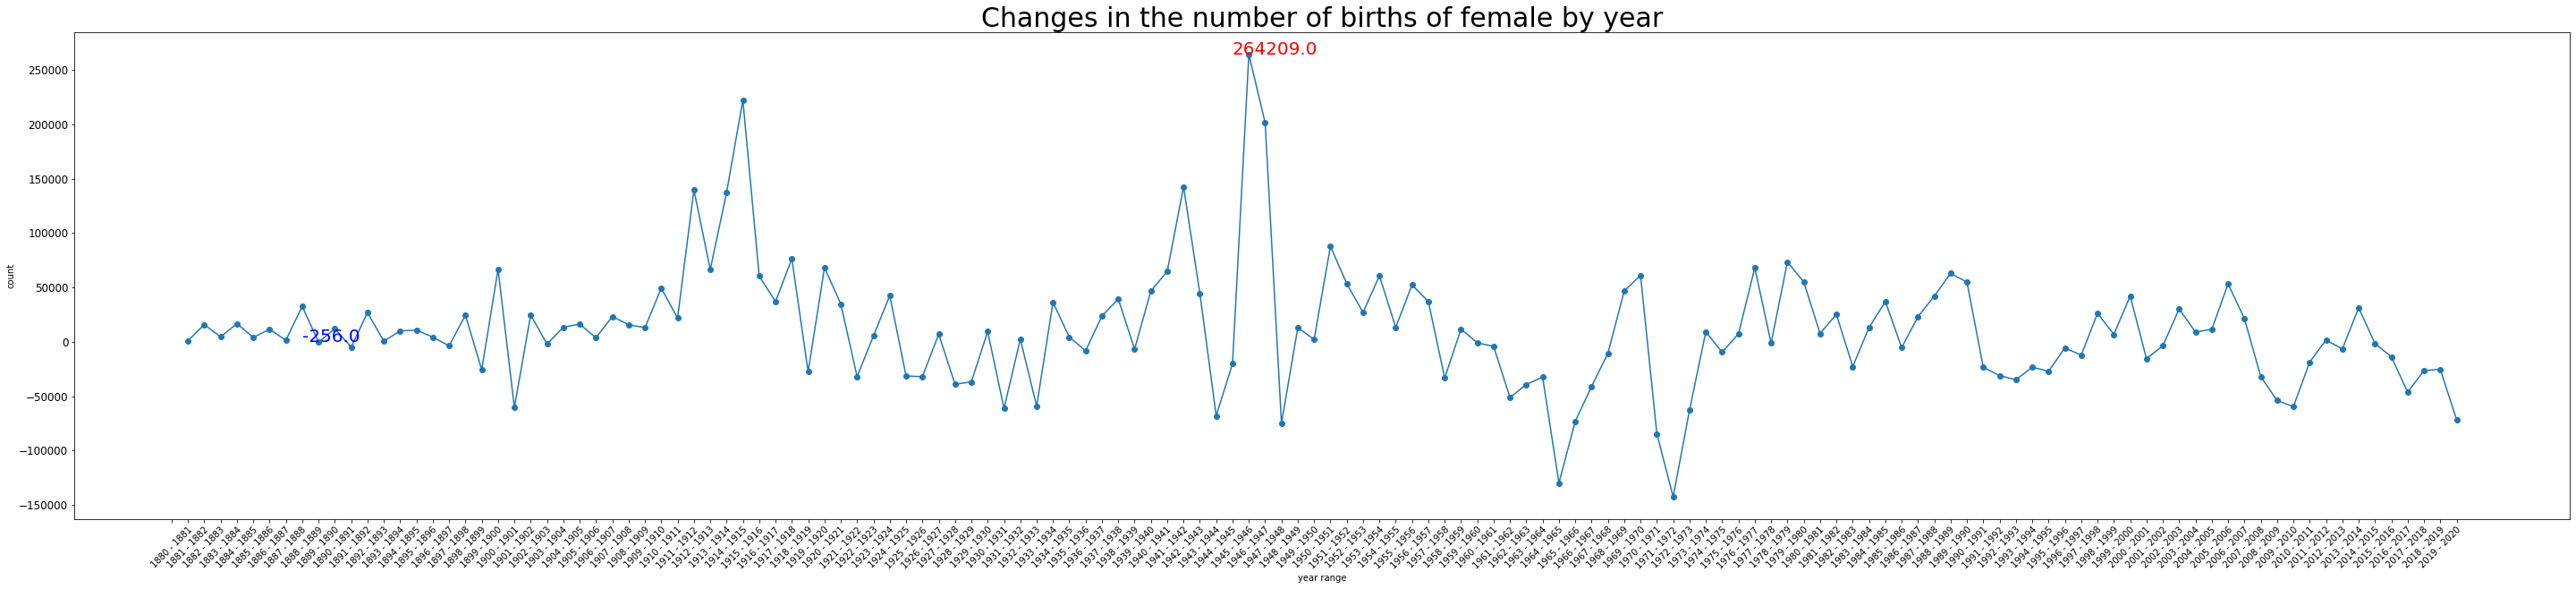

In [ ]:
# draw the graph
change_female = plt.figure(figsize=(50,10))
plt.plot(female_copy.index, female_copy['count change'], marker='o')
plt.yticks(fontsize=12)
plt.xticks(np.arange(141), female_copy['year range'], rotation=45, fontsize=10)
plt.text(female_abs_max_idx, female_copy['count change'].iloc[female_abs_max_idx], female_copy['count change'].iloc[female_abs_max_idx], fontsize=20, color='red')
plt.text(female_abs_min_idx, female_copy['count change'].iloc[female_abs_min_idx], female_copy['count change'].iloc[female_abs_min_idx], fontsize=20, color='blue')
plt.title('Changes in the number of births of female by year', fontsize=30)
plt.xlabel('year range')
plt.ylabel('count')
change_female.show()

# from google.colab import files
# plt.savefig("change births by year (female).png", dpi=300)
# files.download("change births by year (female).png") 

### Define functions

In [ ]:
def get_table(data):
  # make a copy of data & processing 
  data_copy = data.copy()
  data_copy['year range'] = [f"{year-1} - {year}" for year in range(1880, 2021)]
  data_copy['count change'] = (data_copy['count'].shift(-1) - data_copy['count']).shift(1)
  data_copy.reset_index(inplace=True)
  data_copy.fillna(0, inplace = True)
  data_copy.drop(columns=['year', 'count'], index=0, inplace=True)

  # add column "abs change"
  data_copy['abs change'] = abs(data_copy['count change'])

  # find index of maximum 'abs change'
  data_abs_max_idx = np.argmax(data_copy['abs change'])

  # find index of minimum'abs change'
  data_abs_min_idx = np.argmin(data_copy['abs change'])

  # max change & year
  data_max_change = data_copy['count change'].iloc[data_abs_max_idx]
  data_max_year = data_copy['year range'].iloc[data_abs_max_idx]

  # min change &. year
  data_min_change = data_copy['count change'].iloc[data_abs_min_idx]
  data_min_year = data_copy['year range'].iloc[data_abs_min_idx]

  data_count_change = {
      'Change Max' : [data_max_change, data_max_year],
      'Change Min' : [data_min_change, data_min_year]
  }

  data_count_change_df = pd.DataFrame(data_count_change, index=['count change', 'year range'])
  return data_count_change_df
  


check function whether it works or not

In [ ]:
female_ex = get_table(female)
female_ex

,Change Max,Change Min
count change,264209,-256
year range,1945 - 1946,1888 - 1889


In [ ]:
male_ex = get_table(male)
male_ex

,Change Max,Change Min
count change,278174,444
year range,1945 - 1946,1889 - 1890


In [ ]:
both_ex = get_table(both)
both_ex

,Change Max,Change Min
count change,542383,-712
year range,1945 - 1946,2011 - 2012


define the function

In [ ]:
def plot_changes(data): 
  data_copy = data.copy()
  data_copy['year range'] = [f"{year} - {year-1}" for year in range(1880, 2021)]
  data_copy['count change'] = (data_copy['count'].shift(-1) - data_copy['count']).shift(1)
  data_copy.reset_index(inplace=True)
  data_copy.fillna(0, inplace = True)
  data_copy.drop(columns=['year', 'count'], index=0, inplace=True)

  # add column "abs change"
  data_copy['abs change'] = abs(data_copy['count change'])

  # find index of maximum 'abs change'
  data_abs_max_idx = np.argmax(data_copy['abs change'])

  # find index of minimum'abs change'
  data_abs_min_idx = np.argmin(data_copy['abs change'])

  # draw the graph
  plt.figure(figsize=(50,10))
  plt.plot(data_copy.index, data_copy['count change'])
  plt.yticks(fontsize=12)
  plt.xticks(np.arange(len(data)+1), data_copy['year range'], rotation=45, fontsize=10)
  plt.text(data_abs_max_idx, data_copy['count change'].iloc[data_abs_max_idx], data_copy['count change'].iloc[data_abs_max_idx], fontsize=20, color='red')
  plt.text(data_abs_min_idx, data_copy['count change'].iloc[data_abs_min_idx], data_copy['count change'].iloc[data_abs_min_idx], fontsize=20, color='blue')
  plt.title('Changes in the number of births by year', fontsize=30)
  plt.xlabel('year range')
  plt.ylabel('count')
  plt.show()

check function whether it works or not

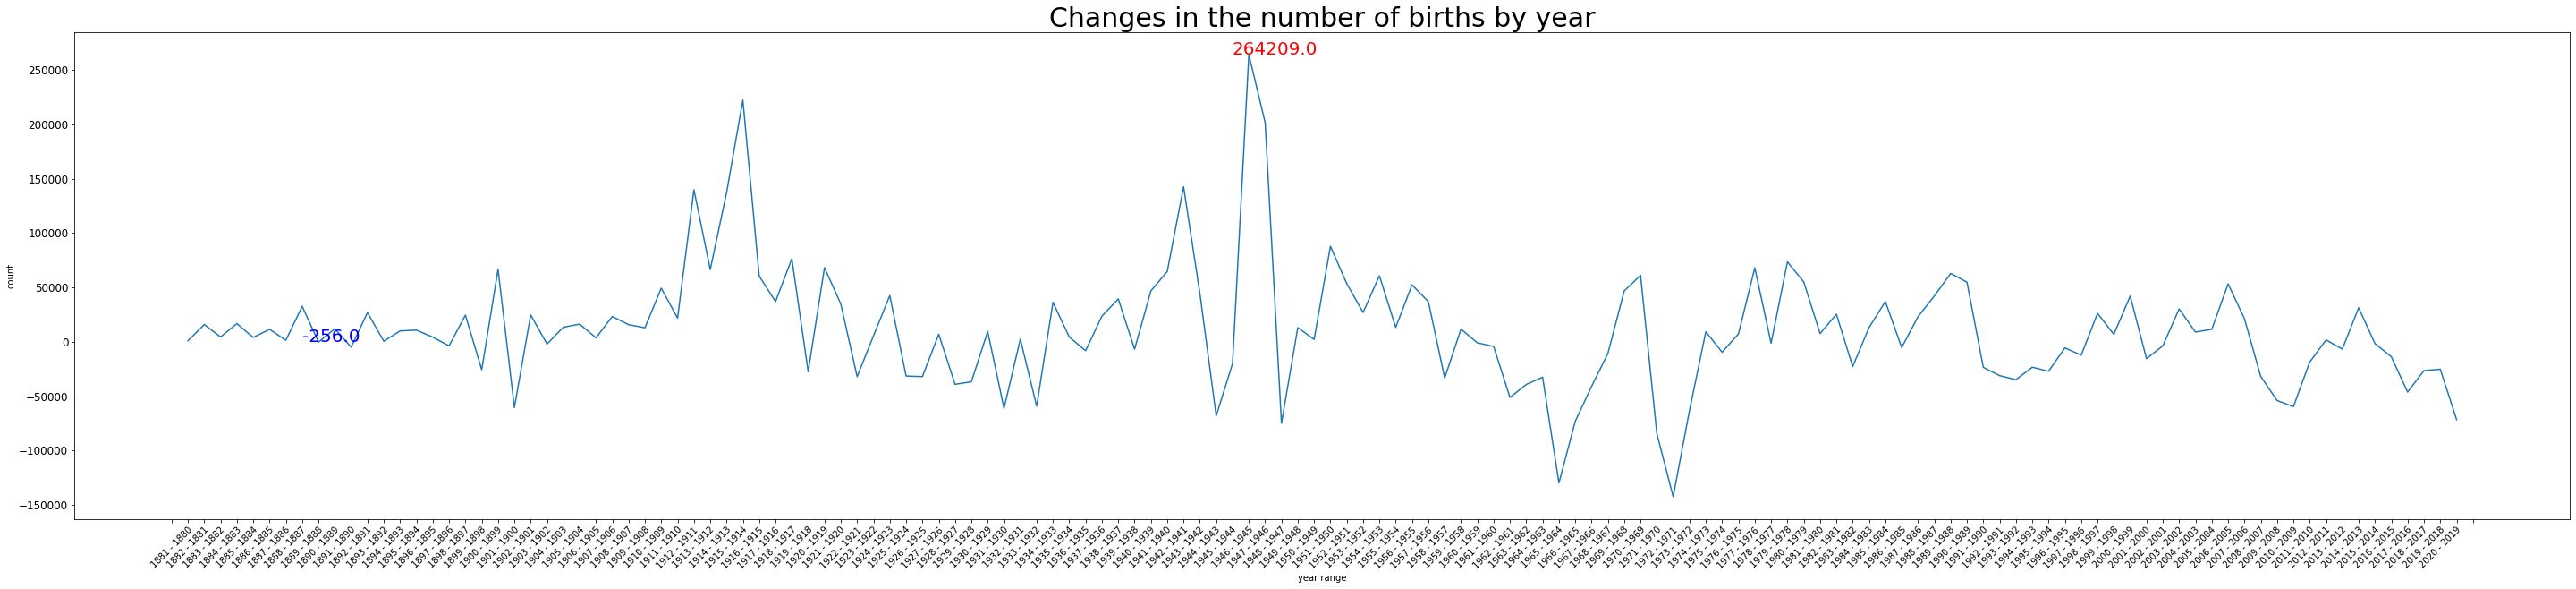

In [ ]:
plot_changes(female)

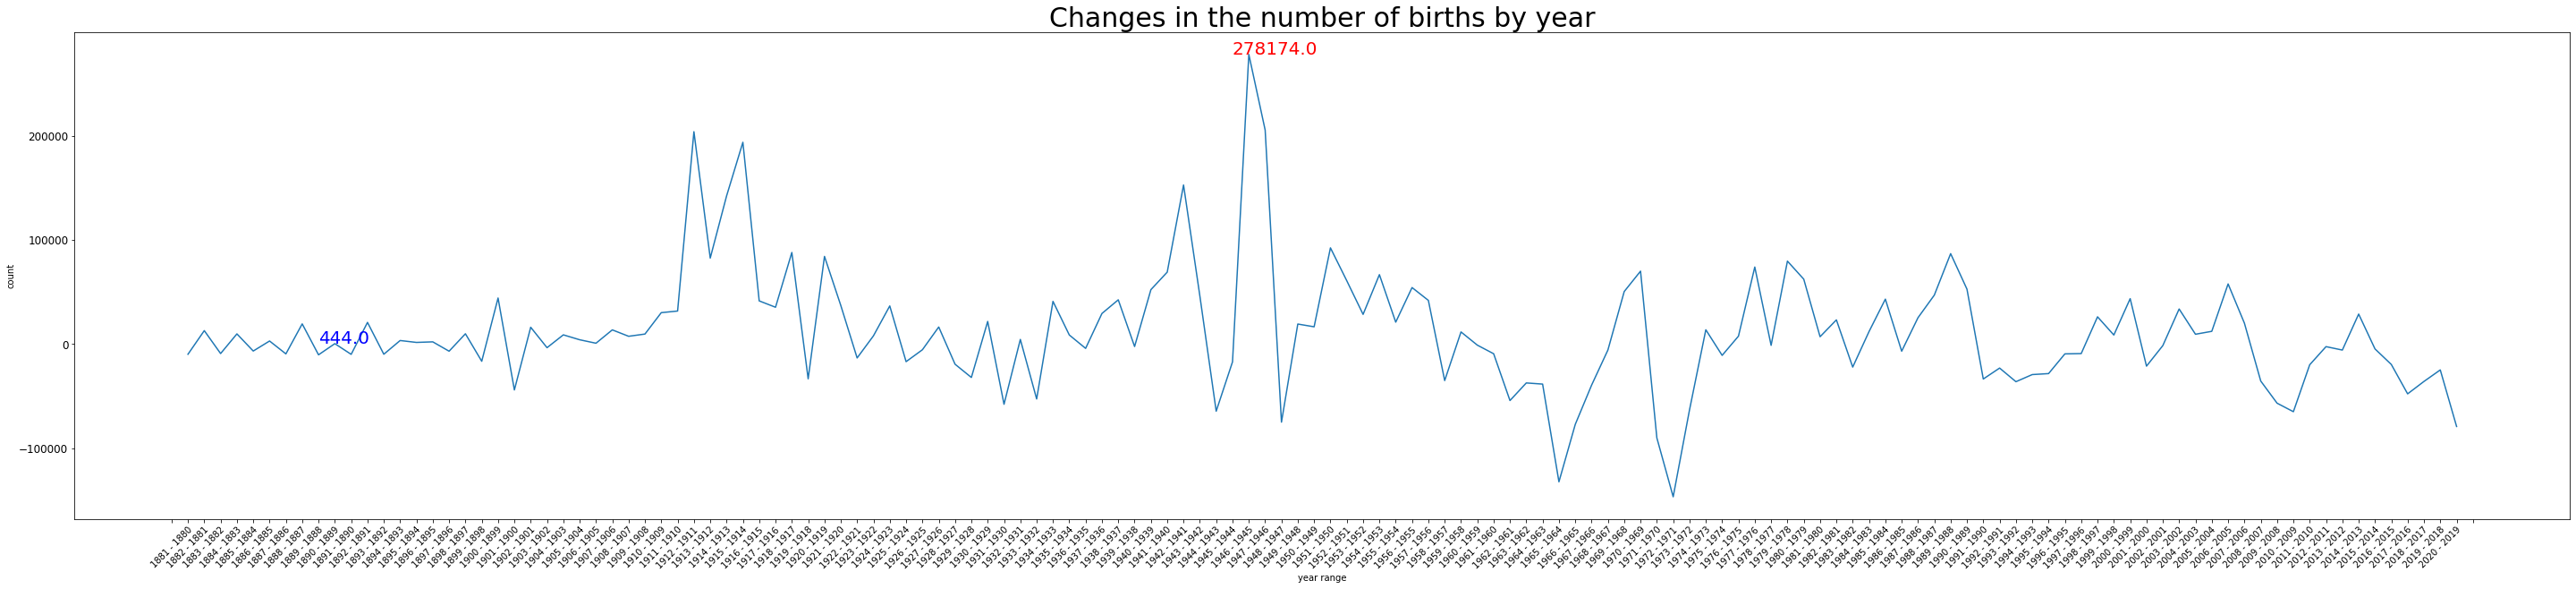

In [ ]:
plot_changes(male)

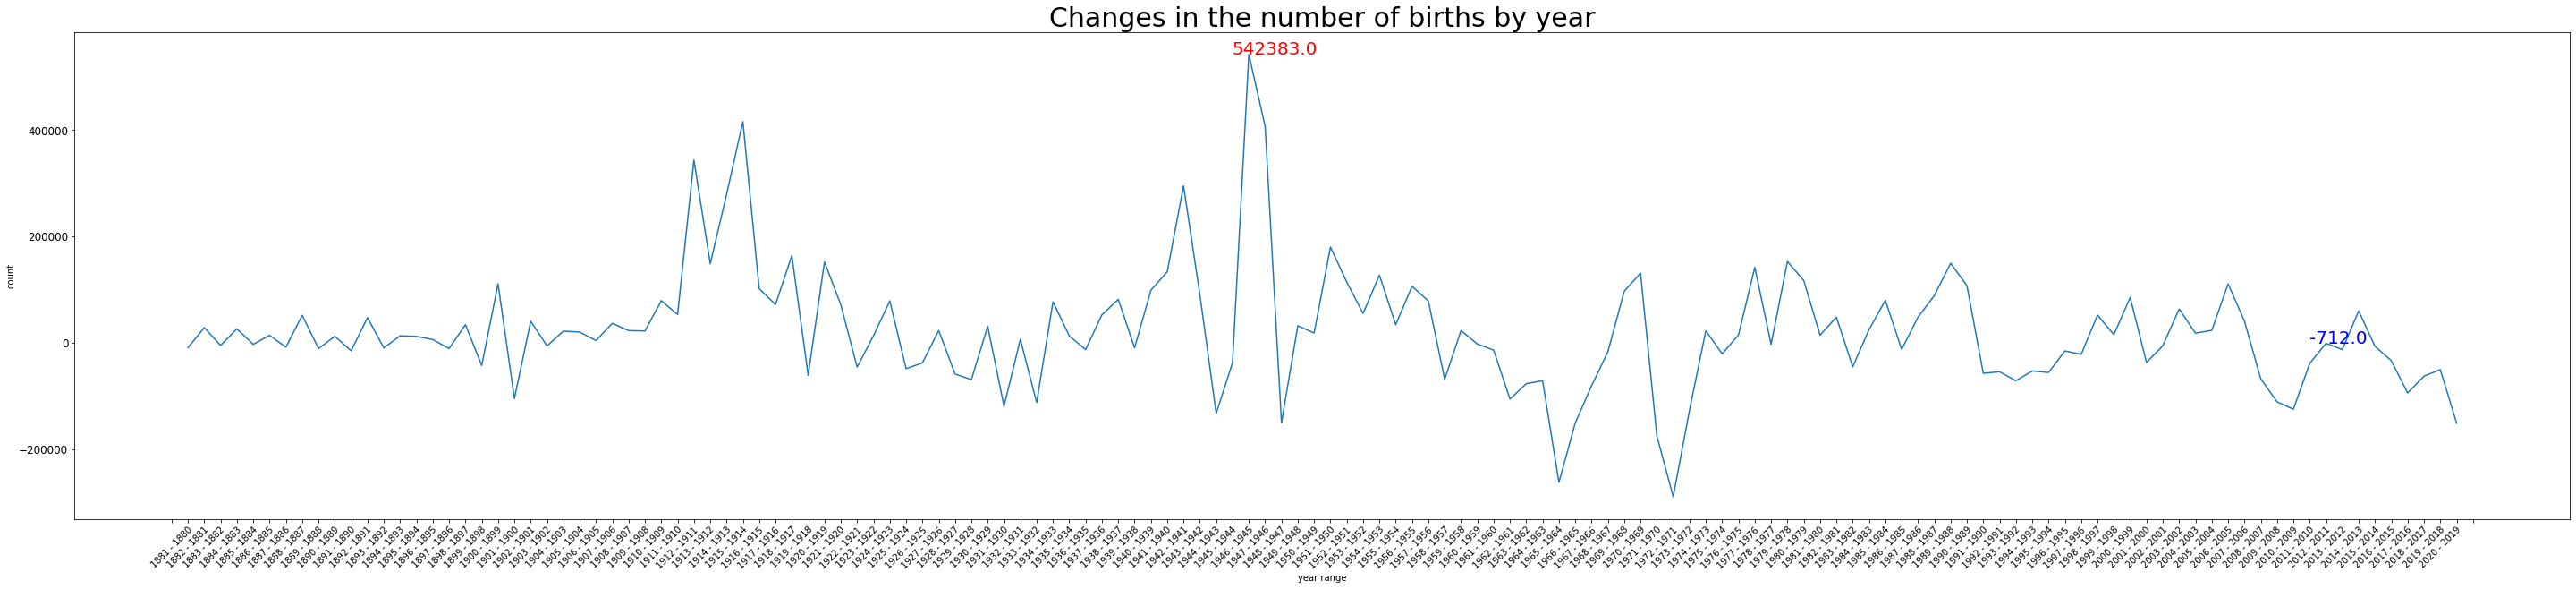

In [ ]:
plot_changes(both)

## 5. Data Analysis Acoording to the name & wordcloud to make visualization

In [ ]:
# if your computer does not 'wordcloud', run this code!
try:
  from wordcloud import WordCloud
except NameError:
  !pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.font_manager as fm

sys_font = fm.findSystemFonts()
sys_font

['/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/Liberati

### Top 100 boy's name for whole years

In [ ]:
df_m = df_all[df_all['sex'] == 'M'] # choose all Male
df_m = df_m[['name', 'count']] # create df_m with 'name', 'count' of columns
df_m = df_m.groupby('name') # Tie it up with the same name.
df_m = df_m.sum() # sum of same name
df_m = df_m.sort_values('count', ascending=False) # sort descending order
df_m.head(10) #show upper 10 values


,count
name,
James,5190161
John,5142243
Robert,4829631
Michael,4383488
William,4143886
David,3638877
Joseph,2631147
Richard,2569278
Charles,2405574


In [ ]:
# top 100 boy's name
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
    width = 1000,
    height = 1000,
    background_color='white'
)
df
text = " ".join(df_m.reset_index()['name'].head(100))
text

'James John Robert Michael William David Joseph Richard Charles Thomas Christopher Daniel Matthew George Anthony Donald Paul Mark Andrew Edward Steven Kenneth Joshua Kevin Brian Ronald Timothy Jason Jeffrey Jacob Ryan Frank Nicholas Gary Eric Stephen Jonathan Larry Justin Samuel Raymond Benjamin Scott Brandon Jack Henry Gregory Alexander Patrick Walter Dennis Jerry Tyler Aaron Peter Jose Adam Nathan Douglas Harold Zachary Arthur Carl Albert Kyle Lawrence Joe Willie Gerald Ethan Roger Jeremy Keith Christian Noah Terry Jesse Harry Austin Sean Ralph Roy Louis Dylan Bruce Bryan Jordan Billy Eugene Gabriel Russell Alan Juan Wayne Logan Vincent Howard Fred Philip Randy'

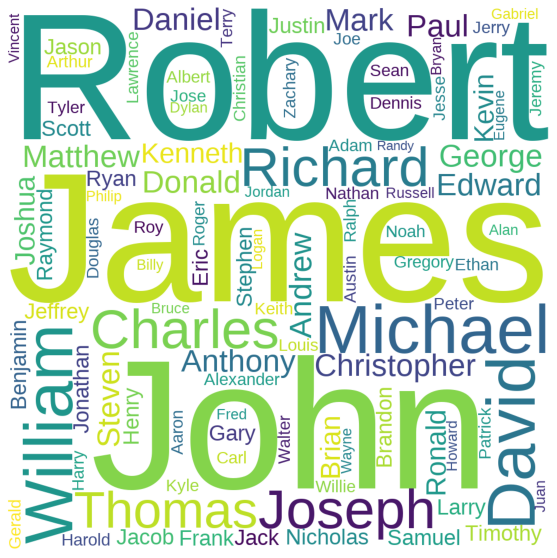

In [ ]:
keyword = wordcloud.generate(text)

array = keyword.to_array()

boys_name100 = plt.figure(figsize = (20, 10))
plt.imshow(
    array
)
plt.axis('off')
boys_name100.show()

# from google.colab import files
# plt.savefig("top100 boy's name.png", dpi=300)
# files.download("top100 boy's name.png") 

### Top 100 girl's name for whole years

same process with boy's name

In [ ]:
df_f = df_all[df_all['sex'] == 'F']
df_f = df_f[['name', 'count']]
df_f = df_f.groupby('name')
df_f = df_f.sum()
df_f = df_f.sort_values('count', ascending=False)
df_f.head(10)

,count
name,
Mary,4130314
Elizabeth,1653689
Patricia,1572554
Jennifer,1468730
Linda,1453408
Barbara,1435049
Margaret,1253426
Susan,1122251
Dorothy,1108769


In [ ]:
# top 100 girl's name
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
    width = 1000,
    height = 1000,
    background_color='white'
)
df
text_f = " ".join(df_f.reset_index()['name'].head(100))
text_f

'Mary Elizabeth Patricia Jennifer Linda Barbara Margaret Susan Dorothy Sarah Jessica Helen Nancy Betty Karen Lisa Anna Sandra Emily Ashley Kimberly Donna Ruth Carol Michelle Laura Amanda Melissa Rebecca Stephanie Deborah Sharon Kathleen Cynthia Emma Amy Shirley Angela Catherine Virginia Katherine Brenda Pamela Evelyn Frances Nicole Christine Samantha Alice Rachel Janet Carolyn Maria Debra Martha Marie Heather Diane Julie Grace Joyce Victoria Olivia Rose Joan Christina Kelly Lauren Ann Julia Doris Jean Lillian Kathryn Judith Mildred Hannah Cheryl Megan Andrea Sara Jacqueline Teresa Gloria Janice Theresa Madison Charlotte Abigail Judy Beverly Sophia Jane Denise Amber Marilyn Danielle Diana Natalie Isabella'

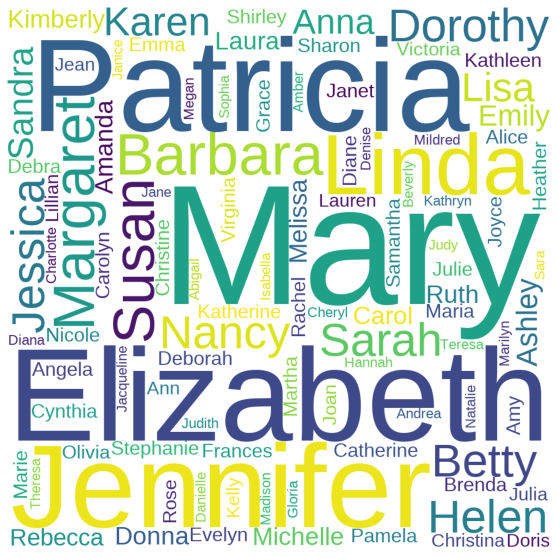

In [ ]:
keyword_f = wordcloud.generate(text_f)

array_f = keyword_f.to_array()

girls_name100 = plt.figure(figsize = (20, 10))
plt.imshow(array_f)
plt.axis('off')
girls_name100.show()

# from google.colab import files
# plt.savefig("top 100 girl's name.png", dpi=300)
# files.download("top 100 girl's name.png") 

### Top 100 names for whole years (boy's + girl's)

same process with above

In [ ]:
df_names = pd.concat([df_m, df_f])
df_names = df_names.reset_index()
df_names = df_names.sort_values('count', ascending = False)
df_names

,name,count
0,James,5190161
1,John,5142243
2,Robert,4829631
3,Michael,4383488
4,William,4143886
...,...,...
37244,Jcorey,5
37243,Zaivian,5
37242,Abigayle,5
37241,Jaeceion,5


In [ ]:
# all name
# top 100 girl's name
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
    width = 1000,
    height = 1000,
    background_color='white'
)
df
text_all = " ".join(df_names.reset_index()['name'].head(100))
text_all


'James John Robert Michael William Mary David Joseph Richard Charles Thomas Christopher Daniel Elizabeth Matthew Patricia George Jennifer Anthony Linda Barbara Donald Paul Mark Andrew Edward Steven Kenneth Margaret Joshua Kevin Brian Susan Dorothy Sarah Ronald Timothy Jessica Jason Helen Nancy Betty Karen Jeffrey Lisa Jacob Ryan Frank Nicholas Gary Anna Eric Sandra Emily Stephen Jonathan Ashley Kimberly Donna Ruth Carol Michelle Larry Laura Amanda Justin Samuel Raymond Benjamin Scott Brandon Melissa Rebecca Stephanie Deborah Sharon Kathleen Jack Henry Cynthia Gregory Emma Alexander Amy Shirley Patrick Angela Catherine Virginia Katherine Walter Dennis Jerry Brenda Pamela Tyler Evelyn Aaron Frances Nicole'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

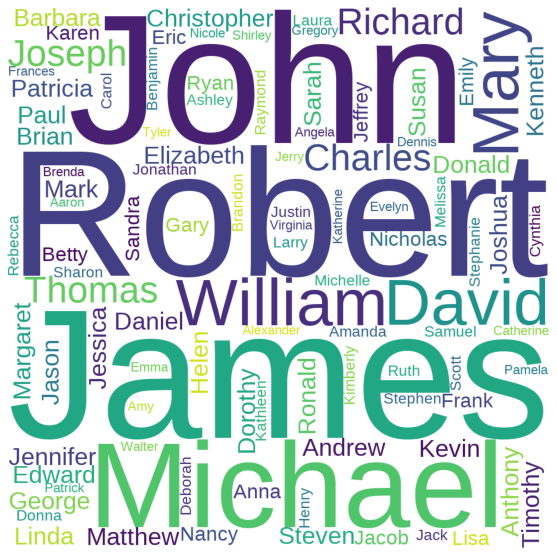

In [ ]:
keyword_all = wordcloud.generate(text_all)

array_all = keyword_all.to_array()

both_name100 = plt.figure(figsize = (20, 10))
plt.imshow(array_all)
plt.axis('off')
both_name100.show()

from google.colab import files
plt.savefig("top 100 names (male+female).png", dpi=300)
files.download("top 100 names (male+female).png") 